# Librerías clave

In [122]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats




#Ejemplo variables categóricas

In [123]:
df = pd.DataFrame({'Grade': ['A','A','A','B','B', 'B', 'B', 'C', 'D', 'D'],
                   'Age': [18, 18, 18, 19, 19, 20, 18, 18, 19, 19],
                   'Gender': ['M','M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'F']})

#view data
df






,Grade,Age,Gender
0,A,18,M
1,A,18,M
2,A,18,F
3,B,19,F
4,B,19,F
5,B,20,M
6,B,18,M
7,C,18,F
8,D,19,M
9,D,19,F


In [167]:
mercadona_pricing = pd.read_csv("./thegurus-opendata-mercadona-es-products.csv")

mercadona_pricing

mercadona_pricing.describe()


,id,price,reference_price
count,1.003020e+06,1.003020e+06,1.003020e+06
mean,9.200872e+05,6.094107e+00,6.950310e+00
std,6.047839e+05,6.572860e+01,1.231294e+01
min,2.487890e+05,1.000000e-01,1.000000e-02
25%,4.995438e+05,1.210000e+00,1.630000e+00
50%,7.502985e+05,1.980000e+00,3.970000e+00
75%,1.001053e+06,3.740000e+00,8.000000e+00
max,2.430674e+06,2.470050e+03,4.324300e+02


In [148]:
mercadona_category = pd.crosstab(index=mercadona_pricing['category'], columns='count')
mercadona_category.head

<bound method NDFrame.head of col_0                                               count
category                                                 
aceite_especias_y_salsas_aceite_vinagre_y_sal          43
aceite_especias_y_salsas_especias                      57
aceite_especias_y_salsas_mayonesa_ketchup_y_mos...     27
aceite_especias_y_salsas_otras_salsas                  55
aceite_vinagre_y_sal                                 7012
...                                                   ...
yogures_y_postres_infantiles                         3100
zumos_fruta_variada                                    29
zumos_melocoton_y_pina                                 16
zumos_naranja                                          12
zumos_tomate_y_otros_sabores                           13

[305 rows x 1 columns]>

In [157]:
mercadona_category/mercadona_category.sum()

col_0,count
category,
aceite_especias_y_salsas_aceite_vinagre_y_sal,0.000043
aceite_especias_y_salsas_especias,0.000057
aceite_especias_y_salsas_mayonesa_ketchup_y_mostaza,0.000027
aceite_especias_y_salsas_otras_salsas,0.000055
aceite_vinagre_y_sal,0.006991
...,...
yogures_y_postres_infantiles,0.003091
zumos_fruta_variada,0.000029
zumos_melocoton_y_pina,0.000016


In [166]:
mercadona_cat_name = pd.crosstab(index=mercadona_pricing['category'], columns=mercadona_pricing['name'],margins=True)
mercadona_c

name,1/4 Sandía,11 Panecillos,2 Baguettes para hornear Hacendado,3 Baguettes masa madre,3 Barras de pan,3 Barras de pan aceite de oliva,3 Barras de pan aceite de oliva rebanadas,3 Barras de pan rebanadas,3 Vegetales para micro,"4 Panes chapata de cristal masa madre, sin aditivos y con aceite de oliva",...,Zumo de tomate Bonnysa,Zumo de tomate Hacendado,Zumo de tomate picante Big Tom,Zumo fresh jengibre & manzana Hacendado,Zumo fresh maracuyá & chía Hacendado,Zumo pura naranja Hacendado,Zumo pura naranja con pulpa Hacendado,Zumo tropical Hacendado,Ñoras Hacendado,All
category,,,,,,,,,,,,,,,,,,,,,
aceite_especias_y_salsas_aceite_vinagre_y_sal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43
aceite_especias_y_salsas_especias,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,57
aceite_especias_y_salsas_mayonesa_ketchup_y_mostaza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
aceite_especias_y_salsas_otras_salsas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,55
aceite_vinagre_y_sal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zumos_fruta_variada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,2,0,29
zumos_melocoton_y_pina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
zumos_naranja,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,12


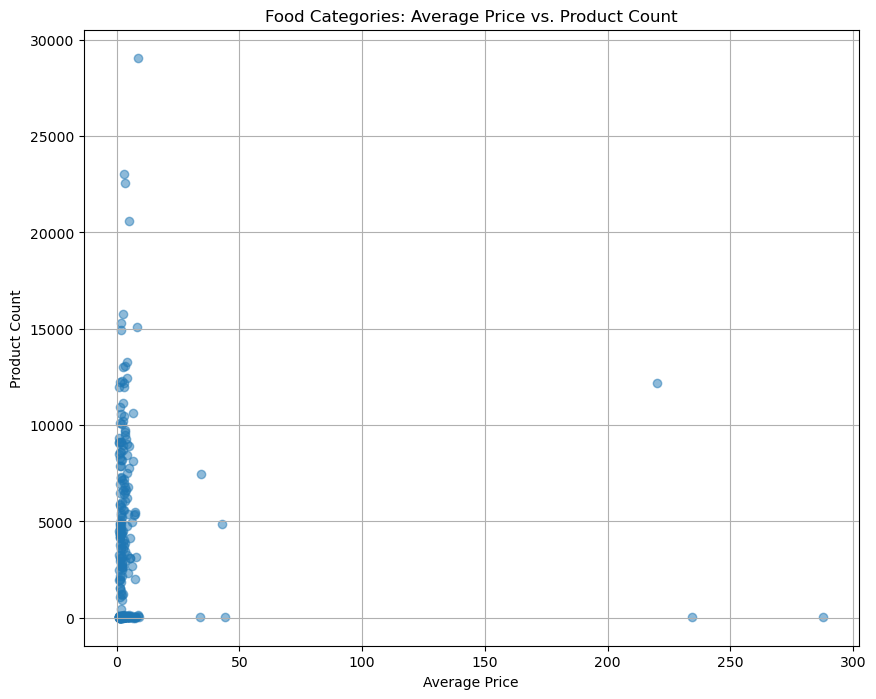

In [168]:
# Aggregate data by category to get average price and product count
category_aggregation = mercadona_pricing.groupby('category').agg(
    average_price=('price', 'mean'),  # Calculate the average price for each category
    product_count=('id', 'count')     # Count the number of products in each category
).reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(category_aggregation['average_price'], category_aggregation['product_count'],
            alpha=0.5)  # alpha is used to adjust the transparency of the dots

# Adding labels and title for the plot
plt.xlabel('Zumos de naranja')
plt.ylabel('Precio')
plt.title('Zumos: Precio por producto')
plt.grid(True)  # Adds a grid for easier visualization

# Display the plot
plt.show()


<BarContainer object of 5 artists>

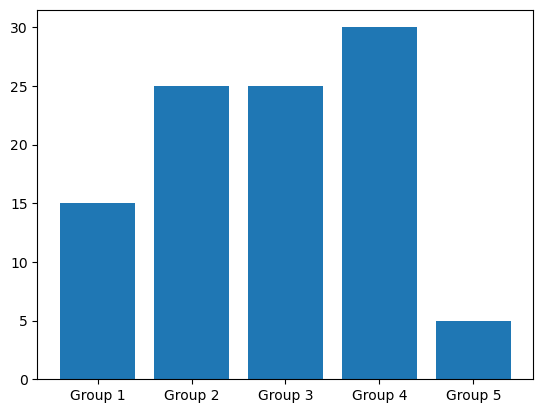

In [129]:
plt.bar(labels, data)

#Ejemplo variables cuantitativas

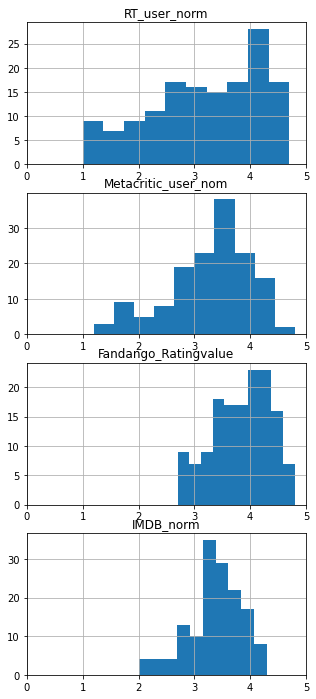

In [ ]:
scores = ["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]

fig = plt.figure(figsize=(5, 12))
for i, sc in enumerate(scores):
    fig.add_subplot(4, 1, i+1)
    ax = movie_reviews[sc].plot(kind='hist')
    ax.set_xlim([0, 5])
    ax.set_ylabel('')
    ax.set_title(sc)
    ax.grid()

plt.show()


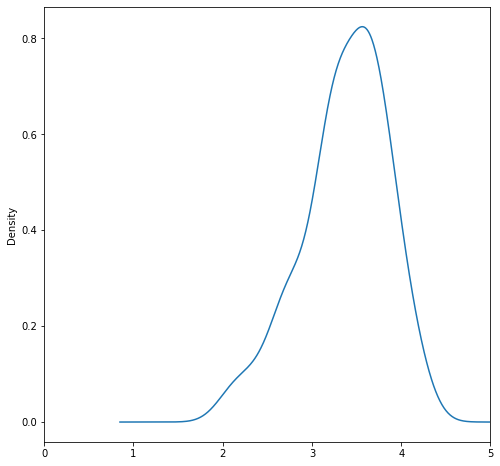

In [ ]:
movie_reviews["IMDB_norm"].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,5));

#Medidas descriptivas

https://docs.python.org/3/library/statistics.html

In [ ]:
statistics.mean(movie_reviews["RottenTomatoes"])

60.84931506849315

In [ ]:
movie_reviews.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


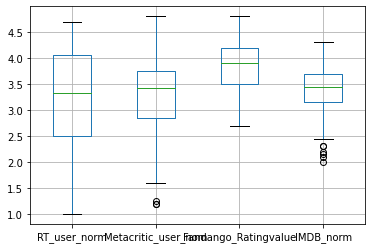

In [ ]:
movie_reviews.boxplot(column=scores)

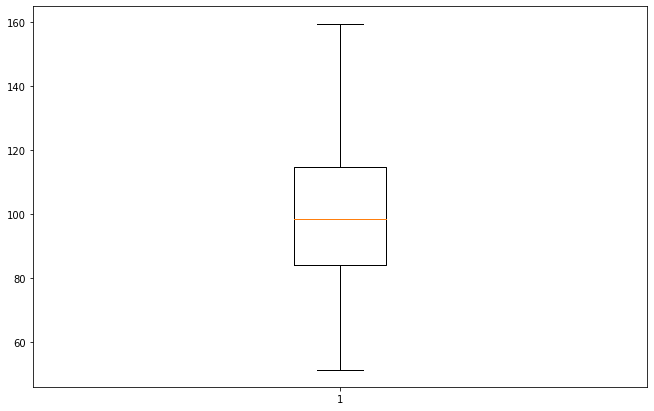

In [ ]:
np.random.seed(167)
data = np.random.normal(100, 20, 200)

fig = plt.figure(figsize =(11, 7))

# Creating plot
plt.boxplot(data)

# show plot
plt.show()

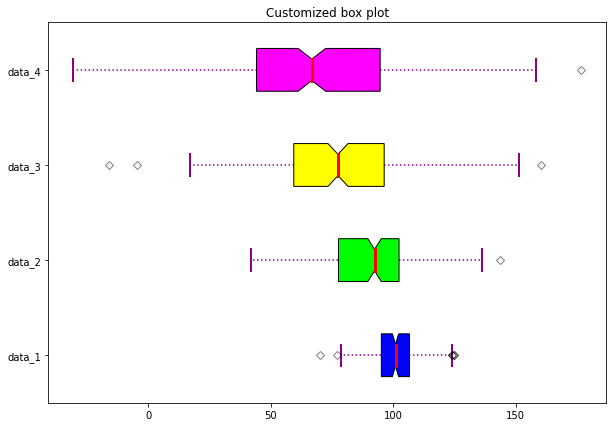

In [ ]:
# Creating dataset
np.random.seed(10)
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# x-axis labels
ax.set_yticklabels(['data_1', 'data_2',
                    'data_3', 'data_4'])

# Adding title
plt.title("Customized box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()

#Descriptiva bivariante

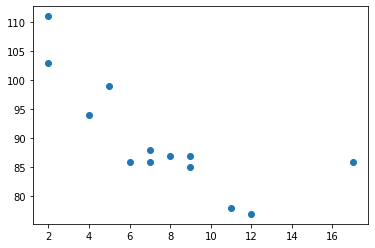

In [ ]:
from numpy.lib.function_base import corrcoef
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)

plt.show()

In [ ]:
corrcoef(x,y)

array([[ 1.        , -0.75859152],
       [-0.75859152,  1.        ]])

In [ ]:
# Matriz de correlación
# ==============================================================================
corr_matrix = movie_reviews.corr(method='pearson')
corr_matrix

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
RottenTomatoes,1.000000,0.781440,0.957360,0.754296,0.779671,0.293988,0.290047,1.000000,0.781440,0.957360,...,0.779671,0.995978,0.780897,0.948434,0.751815,0.744478,0.111325,0.107083,0.000117,0.085298
RottenTomatoes_User,0.781440,1.000000,0.690998,0.687132,0.895297,0.703683,0.724329,0.781440,1.000000,0.690998,...,0.895297,0.787495,0.989966,0.682761,0.667898,0.841442,0.198320,0.221776,0.148359,0.105103
Metacritic,0.957360,0.690998,1.000000,0.723459,0.727298,0.181124,0.177204,0.957360,0.690998,1.000000,...,0.727298,0.954733,0.692954,0.990299,0.718296,0.697297,0.138184,0.114507,-0.001126,0.057465
Metacritic_User,0.754296,0.687132,0.723459,1.000000,0.756265,0.337497,0.336945,0.754296,0.687132,0.723459,...,0.756265,0.750556,0.689367,0.717623,0.982641,0.719909,0.121478,0.112580,-0.066155,0.084842
IMDB,0.779671,0.895297,0.727298,0.756265,1.000000,0.587295,0.600354,0.779671,0.895297,0.727298,...,1.000000,0.777464,0.887406,0.716085,0.727347,0.952130,0.205573,0.230058,0.047570,0.101460
Fandango_Stars,0.293988,0.703683,0.181124,0.337497,0.587295,1.000000,0.959709,0.293988,0.703683,0.181124,...,0.587295,0.300427,0.688312,0.178449,0.323591,0.566273,0.231390,0.305955,0.356693,0.378704
Fandango_Ratingvalue,0.290047,0.724329,0.177204,0.336945,0.600354,0.959709,1.000000,0.290047,0.724329,0.177204,...,0.600354,0.299017,0.705624,0.177586,0.312631,0.568543,0.248686,0.317770,0.407960,0.103378
RT_norm,1.000000,0.781440,0.957360,0.754296,0.779671,0.293988,0.290047,1.000000,0.781440,0.957360,...,0.779671,0.995978,0.780897,0.948434,0.751815,0.744478,0.111325,0.107083,0.000117,0.085298
RT_user_norm,0.781440,1.000000,0.690998,0.687132,0.895297,0.703683,0.724329,0.781440,1.000000,0.690998,...,0.895297,0.787495,0.989966,0.682761,0.667898,0.841442,0.198320,0.221776,0.148359,0.105103
Metacritic_norm,0.957360,0.690998,1.000000,0.723459,0.727298,0.181124,0.177204,0.957360,0.690998,1.000000,...,0.727298,0.954733,0.692954,0.990299,0.718296,0.697297,0.138184,0.114507,-0.001126,0.057465


In [ ]:
df = sns.load_dataset("penguins")
df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


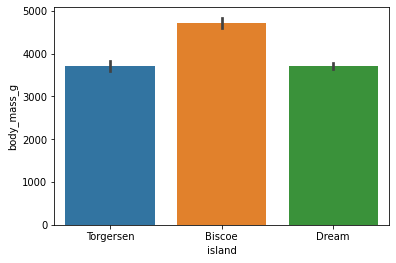

In [ ]:
sns.barplot(data=df, x="island", y="body_mass_g")

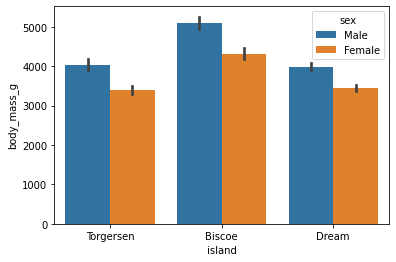

In [ ]:
sns.barplot(data=df, x="island", y="body_mass_g", hue="sex")

In [ ]:
import random


random.choice([1,3,10])

1